Librerías

In [147]:
library(RColorBrewer,ggplot2)
library(reshape2,viridis)
palette(colorRampPalette(brewer.pal(5,"Set1"))(9))
#palette(brewer.pal(5,"Set1"))


1. Crear registro de uso de espacios.

Matriz de false por espacio y fecha para los periodos 2017-2 y 2018-1

2. Cargar uso de espacios

Cargar archivos de registro de uso de espacios 
- Prácticas de laboratorio

- Práctica libre y tutorías

    - La tutoría tiene una duración de 45 minutos
    - La práctica libre dura 90 minutos.

3. Asignar los registros a los espacios

4. Filtrar los espacios en las horas 

In [148]:
#Asignar el uso del espacio al evento
asig_pr_horario=function(reg_uso_spac,seq_tm_spac, pract_inic,pract_fin){
#     reg_uso_spac: Secuencia True/False de registro de uso
#     seq_tm_spac: Vector fecha-hora del registro
#     pract_inic: registro de fecha-hora de inicio
#     pract_fin: registro de fecha-hora de final de la actividad
    reg_uso_spac[seq_tm_spac>pract_inic&seq_tm_spac<pract_fin]=TRUE
    return (reg_uso_spac)
}
conteo_pr_horario=function(reg_uso_spac,seq_tm_spac, pract_inic,pract_fin){
#     reg_uso_spac: Secuencia True/False de registro de uso
#     seq_tm_spac: Vector fecha-hora del registro
#     pract_inic: registro de fecha-hora de inicio
#     pract_fin: registro de fecha-hora de final de la actividad
    reg_uso_spac[seq_tm_spac>pract_inic&seq_tm_spac<pract_fin]=reg_uso_spac[seq_tm_spac>pract_inic&seq_tm_spac<pract_fin]+1
    return (reg_uso_spac)
}

In [149]:
## Validación asignador

#evento 1 # inicio y final
ev_1=c(strptime("07:00:00", "%H:%M:%S"),strptime("08:45:00", "%H:%M:%S"))

#evento 2 # inicio y final
ev_2=c(strptime("08:30:00", "%H:%M:%S"),strptime("10:00:00", "%H:%M:%S"))

#secuencia de tiempo del espacio
espac=seq(strptime("06:58:00", "%H:%M:%S"),strptime("10:05:00", "%H:%M:%S"), by=300)

#Registro de uso del espacio
uso=rep(FALSE, length(espac))
cont=rep(0, length(espac))
print(uso)

uso=(asig_pr_horario(uso,espac,ev_1[1],ev_1[2]))
print(uso)
uso=(asig_pr_horario(uso,espac,ev_2[1],ev_2[2]))
print(uso)

print(cont)
cont=(conteo_pr_horario(uso,espac,ev_1[1],ev_1[2]))
cont=(conteo_pr_horario(uso,espac,ev_1[1],ev_1[2]))
print(cont)

 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE
 [1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE
 [1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE FALSE
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1] 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0


In [150]:
fechas=seq(strptime("2017-06-01 07:02:30", "%F %T"),strptime("2018-06-30 22:57:30", "%F %T"), by=300)
usos_espac=data.frame(gesell=rep(FALSE, length(fechas)),
                      auxiliar=rep(FALSE, length(fechas)),
                      sistemas=rep(FALSE, length(fechas)),
                      mesas_trab=rep(FALSE, length(fechas)),
                      mesas_trab_fr=rep(0, length(fechas)),
                     row.names=fechas)

head(usos_espac)

,gesell,auxiliar,sistemas,mesas_trab,mesas_trab_fr
2017-06-01 07:02:30,FALSE,FALSE,FALSE,FALSE,0
2017-06-01 07:07:30,FALSE,FALSE,FALSE,FALSE,0
2017-06-01 07:12:30,FALSE,FALSE,FALSE,FALSE,0
2017-06-01 07:17:30,FALSE,FALSE,FALSE,FALSE,0
2017-06-01 07:22:30,FALSE,FALSE,FALSE,FALSE,0
2017-06-01 07:27:30,FALSE,FALSE,FALSE,FALSE,0


In [151]:
dat_prl_cons=read.csv2("pr_lib_cons_171_181.csv");str(dat_prl_cons)
fch_prl=strptime(paste(dat_prl_cons$FECHA,dat_prl_cons$HORA), "%d/%m/%Y %H:%M")

'data.frame':	3270 obs. of  9 variables:
 $ No.                : int  4 5 6 72 71 73 74 75 76 212 ...
 $ NOMBRES.Y.APELLIDOS: Factor w/ 1336 levels "Adriana Carrasquilla",..: 970 755 689 1137 574 1110 564 538 235 712 ...
 $ SEMESTRE           : Factor w/ 12 levels "","1","10","2",..: 9 8 8 7 7 7 7 6 6 9 ...
 $ FECHA              : Factor w/ 185 levels "1/03/2018","1/09/2017",..: 170 170 170 171 178 178 178 25 25 93 ...
 $ HORA               : Factor w/ 598 levels "","10:00:00",..: 55 55 55 20 20 20 20 516 516 247 ...
 $ MOTIVO.SOLICITUD   : Factor w/ 6 levels "Consulta","Ingreso",..: 3 3 3 5 5 5 5 5 5 5 ...
 $ MATERIAL           : Factor w/ 136 levels "","16 PF","16 PF-5",..: 1 1 1 92 92 92 92 11 11 6 ...
 $ ASIGNATURA         : Factor w/ 53 levels "","ADMON EMPRESAS",..: 1 1 1 27 33 32 27 30 30 7 ...
 $ Periodo.acad       : Factor w/ 3 levels "2017_1","2017_3",..: 1 1 1 1 1 1 1 1 1 1 ...


In [152]:
for (i in 1:length(fch_prl)){
#     print(paste(i,fch_prl[i],min(fechas),max(fechas)))
    if(!is.na(fch_prl[i])){
        if((fch_prl[i]>min(fechas))&(fch_prl[i]<max(fechas))){
            usos_espac$mesas_trab_fr=conteo_pr_horario(usos_espac$mesas_trab_fr,fechas,fch_prl[i],fch_prl[i]+(60*45))
            usos_espac$mesas_trab=     asig_pr_horario(usos_espac$mesas_trab,fechas,fch_prl[i],fch_prl[i]+(60*45))
#             print(paste(i,fch_prl[i],min(fechas),max(fechas)))
        }
    }
}
table(usos_espac$mesas_trab)


 FALSE   TRUE 
104002   9662 

In [153]:
dat_pr_lab=read.csv2("reg_pr_labs.csv");str(dat_pr_lab)
pr_inic=strptime(paste(dat_pr_lab$Fecha_pr,dat_pr_lab$h_inic), "%d/%m/%Y %H:%M")
pr_fin=strptime(paste(dat_pr_lab$Fecha_pr,dat_pr_lab$h_fin), "%d/%m/%Y %H:%M")

'data.frame':	564 obs. of  9 variables:
 $ Nom_Doc        : Factor w/ 41 levels "Adolfo Valderrama",..: 25 6 28 24 28 12 21 1 15 22 ...
 $ Asignatura     : Factor w/ 30 levels "Aprendizaje y cognición: modelos cognitivos",..: 23 1 3 23 3 6 6 21 19 6 ...
 $ Semestre       : Factor w/ 11 levels "1","10","2","3",..: 5 5 3 1 3 4 4 3 5 4 ...
 $ Num_.Grupo     : Factor w/ 62 levels "0","101","102",..: 31 32 9 3 16 25 19 10 29 26 ...
 $ Num_estudiantes: Factor w/ 43 levels "07:00 - 09:15",..: 22 20 25 35 28 9 28 21 28 30 ...
 $ Fecha_pr       : Factor w/ 149 levels "1/03/2018","1/11/2017",..: 5 27 27 27 27 27 34 34 34 34 ...
 $ h_inic         : Factor w/ 26 levels "10:00","10:30",..: 6 19 1 4 14 15 19 22 3 12 ...
 $ h_fin          : Factor w/ 37 levels "10:00","10:15",..: 15 35 9 11 32 32 35 35 12 26 ...
 $ espacio        : Factor w/ 3 levels "auxiliar","gesell",..: 2 2 1 2 1 2 2 3 2 2 ...


In [154]:
for (i in 1:length(dat_pr_lab$espacio[dat_pr_lab$espacio=="gesell"])){
    usos_espac$gesell=asig_pr_horario(usos_espac$gesell,
                                      fechas,
                                      pr_inic[dat_pr_lab$espacio=="gesell"][i],
                                      pr_fin[dat_pr_lab$espacio=="gesell"][i])
}

for (i in 1:length(dat_pr_lab$espacio[dat_pr_lab$espacio=="auxiliar"])){
    usos_espac$auxiliar=asig_pr_horario(usos_espac$auxiliar,
                                      fechas,
                                      pr_inic[dat_pr_lab$espacio=="auxiliar"][i],
                                      pr_fin[dat_pr_lab$espacio=="auxiliar"][i])
}

for (i in 1:length(dat_pr_lab$espacio[dat_pr_lab$espacio=="sistemas"])){
    usos_espac$sistemas=asig_pr_horario(usos_espac$sistemas,
                                      fechas,
                                      pr_inic[dat_pr_lab$espacio=="sistemas"][i],
                                      pr_fin[dat_pr_lab$espacio=="sistemas"][i])
}


In [155]:
summary(usos_espac)

   gesell         auxiliar        sistemas       mesas_trab     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:107863    FALSE:108267    FALSE:110556    FALSE:104002   
 TRUE :5801      TRUE :5397      TRUE :3108      TRUE :9662     
 NA's :0         NA's :0         NA's :0         NA's :0        
                                                                
                                                                
 mesas_trab_fr    
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.2464  
 3rd Qu.: 0.0000  
 Max.   :36.0000  

Eliminar los días que no son del calendario académico del semestre

In [156]:
inic_2017_2=strptime("2017-07-31 07:00:00","%F %T")
fin_2017_2=strptime("2017-11-18 13:00:00","%F %T")

inic_2018_1=strptime("2018-02-05 07:00:00","%F %T")
fin_2018_1=strptime("2018-06-02 13:00:00","%F %T")

In [157]:
usos_espac=usos_espac[(fechas>inic_2017_2&fechas<fin_2017_2)|(fechas>inic_2018_1&fechas<fin_2018_1),]
fechas=strptime(rownames(usos_espac),"%F %T")
summary(usos_espac)

   gesell         auxiliar        sistemas       mesas_trab     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:59755     FALSE:60216     FALSE:62412     FALSE:55915    
 TRUE :5765      TRUE :5304      TRUE :3108      TRUE :9605     
 NA's :0         NA's :0         NA's :0         NA's :0        
                                                                
                                                                
 mesas_trab_fr    
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.4262  
 3rd Qu.: 0.0000  
 Max.   :36.0000  

Eliminar:

Las horas fuera del horario de práctica (antes de 7:00 a.m. y después de 10:00 p.m.)

Los domingos 

Los sábados después de la 1

Festivos

In [158]:
hora_pr_lab=format(fechas, "%H:%M")
usos_espac=usos_espac[strptime(hora_pr_lab,"%H:%M")>strptime("07:00","%H:%M")&
                      strptime(hora_pr_lab,"%H:%M")<strptime("22:00","%H:%M"),]
fechas=strptime(rownames(usos_espac),"%F %T")
hora_pr_lab=format(fechas, "%H:%M")
summary(usos_espac)

   gesell         auxiliar        sistemas       mesas_trab     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:35239     FALSE:35700     FALSE:37896     FALSE:31415    
 TRUE :5765      TRUE :5304      TRUE :3108      TRUE :9589     
 NA's :0         NA's :0         NA's :0         NA's :0        
                                                                
                                                                
 mesas_trab_fr    
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.6806  
 3rd Qu.: 0.0000  
 Max.   :36.0000  

In [159]:
dia_pr_lab=weekdays(fechas)
dia_pr_lab=factor(dia_pr_lab, levels=c("lunes","martes","miércoles","jueves","viernes","sábado","domingo"), ordered=T)

usos_espac=usos_espac[!dia_pr_lab=="domingo",]

fechas=strptime(rownames(usos_espac),"%F %T")
hora_pr_lab=format(fechas, "%H:%M")
dia_pr_lab=weekdays(fechas)
dia_pr_lab=factor(dia_pr_lab, levels=c("lunes","martes","miércoles","jueves","viernes","sábado","domingo"), ordered=T)
summary(usos_espac)

   gesell         auxiliar        sistemas       mesas_trab     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:29659     FALSE:30147     FALSE:32316     FALSE:25889    
 TRUE :5765      TRUE :5277      TRUE :3108      TRUE :9535     
 NA's :0         NA's :0         NA's :0         NA's :0        
                                                                
                                                                
 mesas_trab_fr   
 Min.   : 0.000  
 1st Qu.: 0.000  
 Median : 0.000  
 Mean   : 0.782  
 3rd Qu.: 1.000  
 Max.   :36.000  

In [160]:
usos_espac=usos_espac[!(dia_pr_lab=="sábado"&strptime(hora_pr_lab,"%H:%M")>strptime("13:00","%H:%M")),]

fechas=strptime(rownames(usos_espac),"%F %T")
hora_pr_lab=format(fechas, "%H:%M")
dia_pr_lab=weekdays(fechas)
dia_pr_lab=factor(dia_pr_lab, levels=c("lunes","martes","miércoles","jueves","viernes","sábado","domingo"), ordered=T)
summary(usos_espac)
str(usos_espac)

   gesell         auxiliar        sistemas       mesas_trab     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:26311     FALSE:26811     FALSE:28968     FALSE:22588    
 TRUE :5765      TRUE :5265      TRUE :3108      TRUE :9488     
 NA's :0         NA's :0         NA's :0         NA's :0        
                                                                
                                                                
 mesas_trab_fr    
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.8603  
 3rd Qu.: 1.0000  
 Max.   :36.0000  

'data.frame':	32076 obs. of  5 variables:
 $ gesell       : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ auxiliar     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ sistemas     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ mesas_trab   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ mesas_trab_fr: num  0 0 0 0 0 0 0 0 0 0 ...


In [161]:
festivos=strptime(c("7/08/2017",
           "21/08/2017",
           "16/10/2017",
           "6/11/2017",
           "13/11/2017",
           "19/03/2018",
           "26/03/2018",
           "27/03/2018",
           "28/03/2018",
           "29/03/2018",
           "30/03/2018",
           "31/03/2018",
           "1/05/2018",
           "14/05/2018"),"%d/%m/%Y")

dma_pr_lab=strptime(format(fechas, "%F"), "%F")

usos_espac=usos_espac[!(dma_pr_lab%in%festivos),]

fechas=strptime(rownames(usos_espac),"%F %T")
hora_pr_lab=format(fechas, "%H:%M")
dia_pr_lab=weekdays(fechas)
dia_pr_lab=factor(dia_pr_lab, levels=c("lunes","martes","miércoles","jueves","viernes","sábado","domingo"), ordered=T)
summary(usos_espac)
str(usos_espac)

   gesell         auxiliar        sistemas       mesas_trab     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:23899     FALSE:24399     FALSE:26556     FALSE:20176    
 TRUE :5765      TRUE :5265      TRUE :3108      TRUE :9488     
 NA's :0         NA's :0         NA's :0         NA's :0        
                                                                
                                                                
 mesas_trab_fr    
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.9302  
 3rd Qu.: 1.0000  
 Max.   :36.0000  

'data.frame':	29664 obs. of  5 variables:
 $ gesell       : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ auxiliar     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ sistemas     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ mesas_trab   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ mesas_trab_fr: num  0 0 0 0 0 0 0 0 0 0 ...


In [162]:
prop.table(table(usos_espac$gesell))

prop.table(table(usos_espac$auxiliar))

prop.table(table(usos_espac$sistemas))

prop.table(table(usos_espac$mesas_trab))


    FALSE      TRUE 
0.8056567 0.1943433 


    FALSE      TRUE 
0.8225121 0.1774879 


    FALSE      TRUE 
0.8952265 0.1047735 


   FALSE     TRUE 
0.680151 0.319849 

In [163]:
hora_pr_lab_2=factor(format(fechas, "%H"))

In [164]:
tot_ocurr_hora=table(hora_pr_lab_2,dia_pr_lab)
as.matrix(tot_ocurr_hora)

             dia_pr_lab
hora_pr_lab_2 lunes martes miércoles jueves viernes sábado domingo
           07   300    372       384    384     384    384       0
           08   300    372       384    384     384    384       0
           09   300    372       384    384     384    384       0
           10   300    372       384    384     384    384       0
           11   300    372       384    384     384    384       0
           12   300    372       384    384     384    384       0
           13   300    372       384    384     384      0       0
           14   300    372       384    384     384      0       0
           15   300    372       384    384     384      0       0
           16   300    372       384    384     384      0       0
           17   300    372       384    384     384      0       0
           18   300    372       384    384     384      0       0
           19   300    372       384    384     384      0       0
           20   300    372       384  

In [165]:
uso_gesell   =table(hora_pr_lab_2[usos_espac$gesell],    dia_pr_lab[usos_espac$gesell])
uso_auxiliar =table(hora_pr_lab_2[usos_espac$auxiliar],  dia_pr_lab[usos_espac$auxiliar])
uso_sistemas =table(hora_pr_lab_2[usos_espac$sistemas],  dia_pr_lab[usos_espac$sistemas])
uso_mesas    =table(hora_pr_lab_2[usos_espac$mesas_trab],dia_pr_lab[usos_espac$mesas_trab])

In [166]:
uso_gesell_prop=uso_gesell/tot_ocurr_hora
uso_auxiliar_prop=uso_auxiliar/tot_ocurr_hora
uso_sistemas_prop=uso_sistemas/tot_ocurr_hora
uso_mesas_prop=uso_mesas/tot_ocurr_hora

In [184]:
uso_gesell_prop
uso_auxiliar_prop
uso_sistemas_prop
uso_mesas_prop

    
          lunes     martes  miércoles     jueves    viernes     sábado domingo
  07 0.20000000 0.45161290 0.18750000 0.21875000 0.23437500 0.34375000        
  08 0.20000000 0.46774194 0.21875000 0.26562500 0.32812500 0.33854167        
  09 0.08000000 0.25806452 0.22656250 0.26562500 0.25000000 0.26562500        
  10 0.09000000 0.25806452 0.30468750 0.24218750 0.25000000 0.26562500        
  11 0.22000000 0.27419355 0.20312500 0.23437500 0.21875000 0.17187500        
  12 0.21000000 0.17741935 0.04687500 0.15625000 0.11718750 0.00000000        
  13 0.04000000 0.00000000 0.00000000 0.00000000 0.00000000                   
  14 0.04000000 0.03225806 0.00000000 0.12500000 0.03125000                   
  15 0.04000000 0.03225806 0.00000000 0.10937500 0.03125000                   
  16 0.08000000 0.03225806 0.00000000 0.03125000 0.00000000                   
  17 0.04000000 0.04301075 0.03125000 0.06250000 0.01562500                   
  18 0.04000000 0.34677419 0.39062500 0.4140625

    
          lunes     martes  miércoles     jueves    viernes     sábado domingo
  07 0.41000000 0.54838710 0.41406250 0.12500000 0.34375000 0.01562500        
  08 0.44000000 0.58064516 0.50000000 0.12500000 0.39062500 0.09375000        
  09 0.42000000 0.39516129 0.40625000 0.03125000 0.28906250 0.09375000        
  10 0.68000000 0.29032258 0.28906250 0.07031250 0.20312500 0.09375000        
  11 0.48000000 0.08064516 0.17187500 0.09375000 0.09375000 0.09375000        
  12 0.08000000 0.00000000 0.03125000 0.04687500 0.03125000 0.03645833        
  13 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000                   
  14 0.00000000 0.00000000 0.03125000 0.00000000 0.00000000                   
  15 0.00000000 0.00000000 0.03125000 0.00000000 0.00000000                   
  16 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000                   
  17 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000                   
  18 0.05000000 0.16935484 0.46875000 0.2578125

    
         lunes    martes miércoles    jueves   viernes    sábado domingo
  07 0.3200000 0.1854839 0.1250000 0.1562500 0.0625000 0.0000000        
  08 0.3200000 0.3064516 0.1875000 0.1718750 0.0937500 0.0000000        
  09 0.0800000 0.1774194 0.1562500 0.0703125 0.0546875 0.0000000        
  10 0.0800000 0.1532258 0.2734375 0.0625000 0.0312500 0.0000000        
  11 0.0400000 0.2258065 0.2500000 0.0625000 0.0156250 0.0000000        
  12 0.0000000 0.1532258 0.1328125 0.0390625 0.0000000 0.0000000        
  13 0.0000000 0.0000000 0.0312500 0.0000000 0.0000000                  
  14 0.0000000 0.0000000 0.0312500 0.0000000 0.0000000                  
  15 0.0000000 0.0000000 0.0312500 0.0000000 0.0000000                  
  16 0.0000000 0.0000000 0.0312500 0.0000000 0.0312500                  
  17 0.0000000 0.0000000 0.0312500 0.0000000 0.0312500                  
  18 0.2900000 0.2419355 0.2187500 0.1406250 0.0703125                  
  19 0.4300000 0.3629032 0.3125000 0.2265625 0

    
          lunes     martes  miércoles     jueves    viernes     sábado domingo
  07 0.04000000 0.13172043 0.07291667 0.04687500 0.04947917 0.03125000        
  08 0.28666667 0.36290323 0.18489583 0.11197917 0.17187500 0.09895833        
  09 0.36000000 0.41666667 0.47656250 0.50260417 0.46614583 0.24739583        
  10 0.46666667 0.41935484 0.28385417 0.51041667 0.54427083 0.16145833        
  11 0.48000000 0.44892473 0.34895833 0.58333333 0.45833333 0.08333333        
  12 0.34666667 0.49462366 0.45052083 0.59114583 0.41666667 0.07291667        
  13 0.14666667 0.18817204 0.11979167 0.25260417 0.13020833                   
  14 0.44666667 0.46236559 0.24218750 0.44010417 0.35156250                   
  15 0.39666667 0.42741935 0.34635417 0.45833333 0.20833333                   
  16 0.38000000 0.40860215 0.26562500 0.39843750 0.26562500                   
  17 0.56000000 0.41666667 0.36979167 0.32031250 0.48177083                   
  18 0.72000000 0.40591398 0.37760417 0.3880208

In [167]:
Gesell=round((uso_gesell/tot_ocurr_hora)*100,0)
Auxiliar=round((uso_auxiliar/tot_ocurr_hora)*100,0)
Sistemas=round((uso_sistemas/tot_ocurr_hora)*100,0)
Mesas=round((uso_mesas/tot_ocurr_hora)*100,0)

In [168]:
graf_uso=function(tabla_prop_usos, nom_espacio){
    
    uso_hr_dy_tbl_prl=t(tabla_prop_usos)
    uso_hr_dy_tbl_prl=uso_hr_dy_tbl_prl[,order(colnames(uso_hr_dy_tbl_prl), decreasing=T)]
    bl_colors_5=c("white",colorRampPalette(c('#deebf7', '#08519c'))(100))#;X11();plot(1:length(bl_colors_4),rep(0, length(bl_colors_4)), col=bl_colors_4, pch=15, cex=1)


    par(mai=c(1,1,1,.1))
    image(
        uso_hr_dy_tbl_prl, col=bl_colors_4,
        xaxt = 'n',	yaxt = 'n', main="Consultas y prácticas por dia y hora",sub=nom_espacio
    )
    axis(
        cex.axis=0.7,
        labels=colnames(uso_hr_dy_tbl_prl),
        side = 2,
        at=seq(0,1,length.out = length(colnames(uso_hr_dy_tbl_prl)))
    )
    axis(
        las=2,cex.axis=0.6,
        labels=rownames(uso_hr_dy_tbl_prl),
        side = 1,
        at=seq(0,1,length.out = length(rownames(uso_hr_dy_tbl_prl)))
    )
    par(mai=c(1,1,1,1))
    
}

    
     lunes martes miércoles jueves viernes sábado domingo
  07    20     45        19     22      23     34        
  08    20     47        22     27      33     34        
  09     8     26        23     27      25     27        
  10     9     26        30     24      25     27        
  11    22     27        20     23      22     17        
  12    21     18         5     16      12      0        
  13     4      0         0      0       0               
  14     4      3         0     12       3               
  15     4      3         0     11       3               
  16     8      3         0      3       0               
  17     4      4         3      6       2               
  18     4     35        39     41      13               
  19    19     47        51     54      22               
  20    36     33        48     41      41               
  21    30     13        28     25      33               

    
     lunes martes miércoles jueves viernes sábado domingo
  07    41     55        41     12      34      2        
  08    44     58        50     12      39      9        
  09    42     40        41      3      29      9        
  10    68     29        29      7      20      9        
  11    48      8        17      9       9      9        
  12     8      0         3      5       3      4        
  13     0      0         0      0       0               
  14     0      0         3      0       0               
  15     0      0         3      0       0               
  16     0      0         0      0       0               
  17     0      0         0      0       0               
  18     5     17        47     26       5               
  19    47     28        62     42       8               
  20    66     33        36     53      12               
  21    44     23         8     41      12               

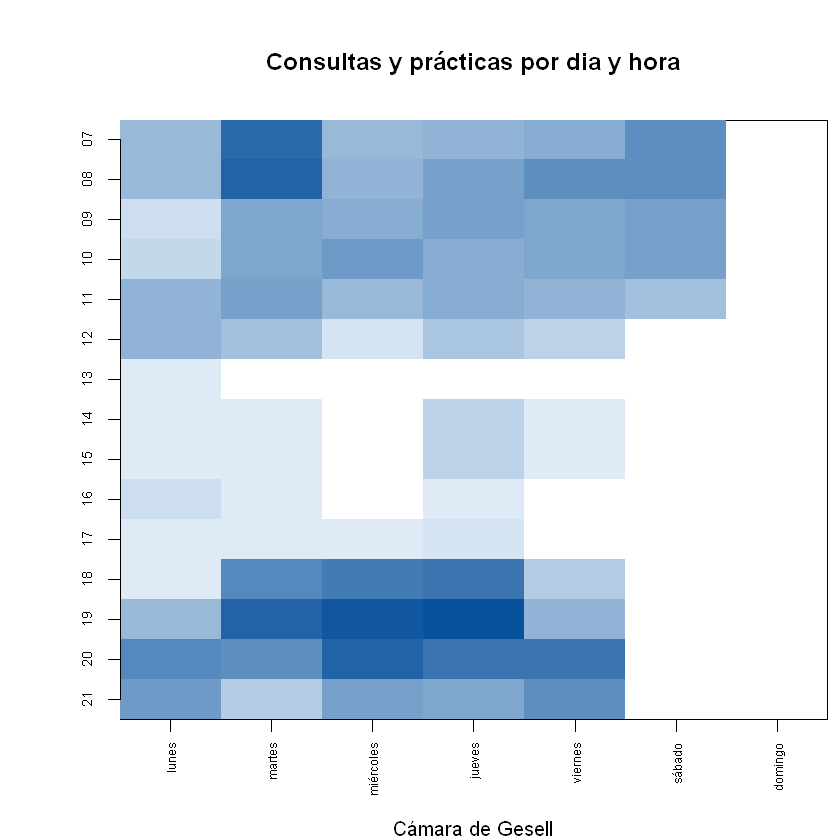

    
     lunes martes miércoles jueves viernes sábado domingo
  07    32     19        12     16       6      0        
  08    32     31        19     17       9      0        
  09     8     18        16      7       5      0        
  10     8     15        27      6       3      0        
  11     4     23        25      6       2      0        
  12     0     15        13      4       0      0        
  13     0      0         3      0       0               
  14     0      0         3      0       0               
  15     0      0         3      0       0               
  16     0      0         3      0       3               
  17     0      0         3      0       3               
  18    29     24        22     14       7               
  19    43     36        31     23      10               
  20    38     37        18     27       8               
  21    24     25         6     19       3               

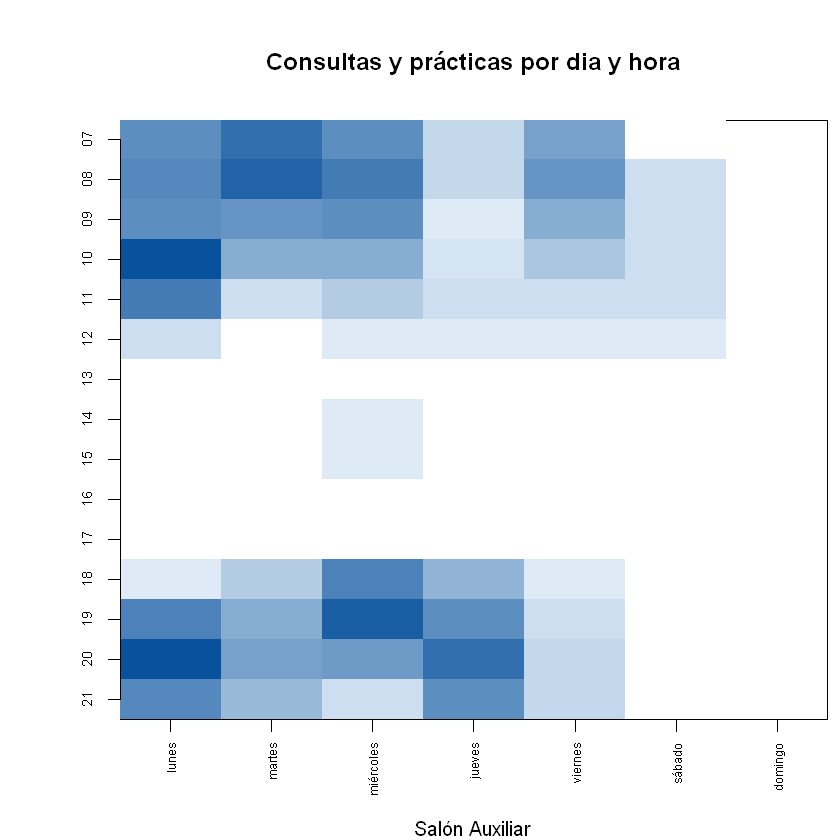

    
     lunes martes miércoles jueves viernes sábado domingo
  07     4     13         7      5       5      3        
  08    29     36        18     11      17     10        
  09    36     42        48     50      47     25        
  10    47     42        28     51      54     16        
  11    48     45        35     58      46      8        
  12    35     49        45     59      42      7        
  13    15     19        12     25      13               
  14    45     46        24     44      35               
  15    40     43        35     46      21               
  16    38     41        27     40      27               
  17    56     42        37     32      48               
  18    72     41        38     39      48               
  19    55     32        33     38      51               
  20    37     24        38     24      29               
  21    10      7         7      7      11               

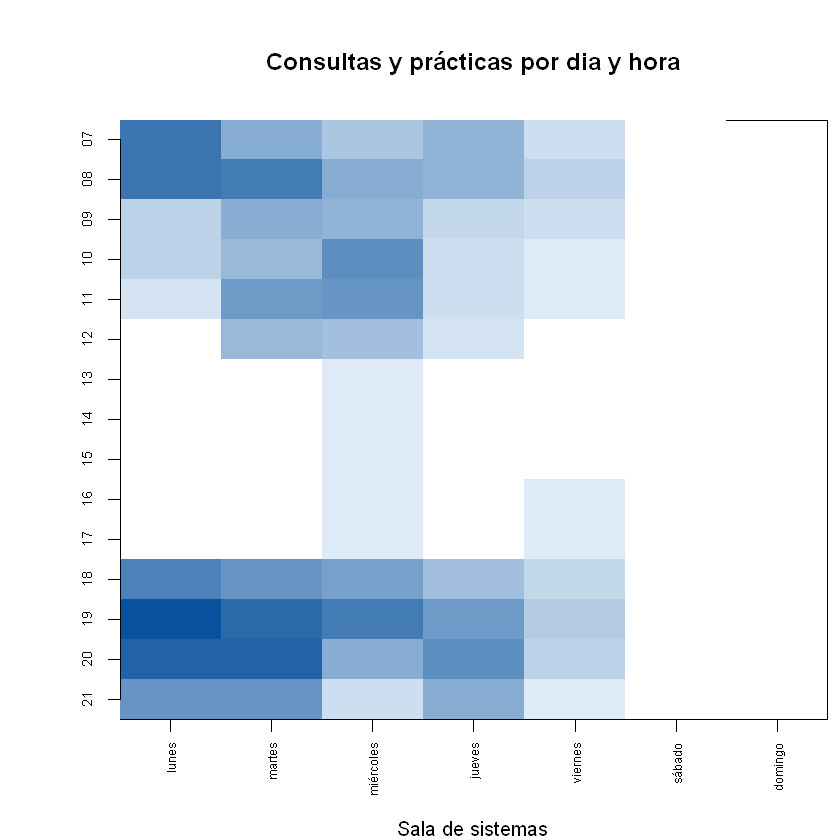

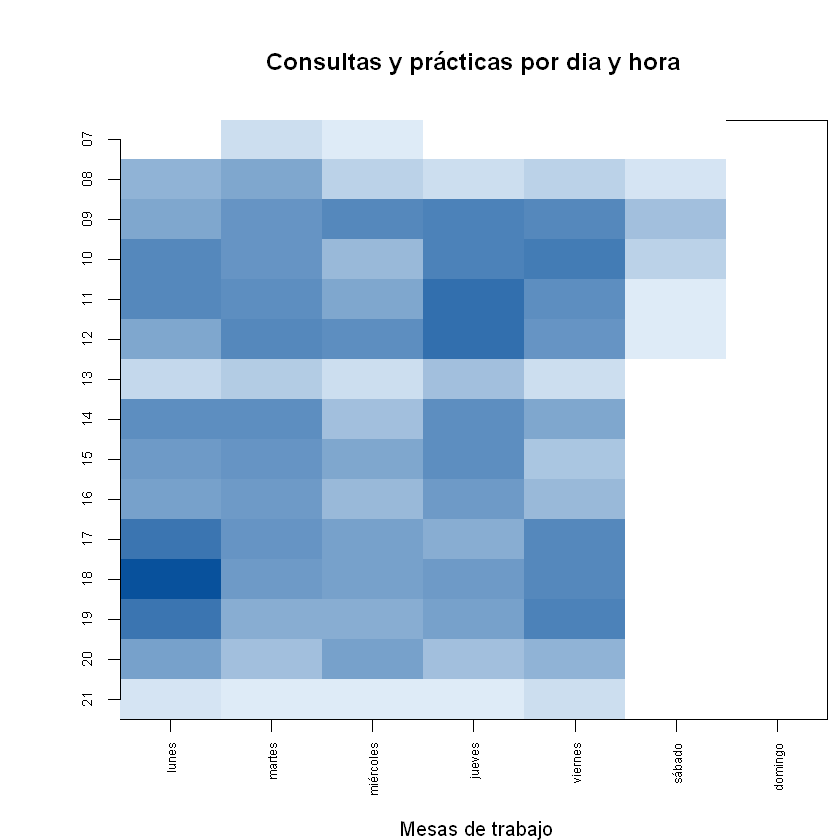

In [183]:
Gesell
graf_uso(gesell_100, "Cámara de Gesell")
Auxiliar
graf_uso(auxiliar_100, "Salón Auxiliar")
Sistemas
graf_uso(sistemas_100,"Sala de sistemas")
Mesas
graf_uso(mesas_100," Mesas de trabajo")

In [178]:
us_2=cbind(usos_espac,data.frame(fechas,hora_pr_lab,dia_pr_lab,hora_pr_lab_2))
str(us_2)

'data.frame':	29664 obs. of  9 variables:
 $ gesell       : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ auxiliar     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ sistemas     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ mesas_trab   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ mesas_trab_fr: num  0 0 0 0 0 0 0 0 0 0 ...
 $ fechas       : POSIXct, format: "2017-07-31 07:02:30" "2017-07-31 07:07:30" ...
 $ hora_pr_lab  : Factor w/ 180 levels "07:02","07:07",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ dia_pr_lab   : Ord.factor w/ 7 levels "lunes"<"martes"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ hora_pr_lab_2: Factor w/ 15 levels "07","08","09",..: 1 1 1 1 1 1 1 1 1 1 ...


In [181]:
with(us_2, tapply(mesas_trab_fr, list(hora_pr_lab_2, dia_pr_lab), FUN=max))

,lunes,martes,miércoles,jueves,viernes,sábado,domingo
07,4,36,9,1,3,2,NA
08,10,36,9,9,8,3,NA
09,11,12,9,16,8,7,NA
10,13,9,10,13,11,11,NA
11,16,13,19,13,12,11,NA
12,10,12,13,13,14,2,NA
13,6,10,5,9,11,NA,NA
14,12,12,7,14,11,NA,NA
15,11,10,6,11,5,NA,NA
16,4,7,4,11,5,NA,NA


In [182]:
with(us_2, tapply(mesas_trab_fr, list(hora_pr_lab_2, dia_pr_lab), FUN=mean))

,lunes,martes,miércoles,jueves,viernes,sábado,domingo
07,0.07333333,0.7956989,0.2239583,0.0468750,0.08072917,0.06250000,NA
08,0.66666667,1.4274194,0.5026042,0.2968750,0.37500000,0.17968750,NA
09,1.28333333,1.6344086,1.5937500,2.6197917,1.31250000,0.57031250,NA
10,2.01333333,1.2956989,0.7421875,1.8802083,1.80468750,0.37500000,NA
11,1.79666667,1.3494624,1.1041667,2.6354167,1.79166667,0.28125000,NA
12,1.11666667,1.6424731,1.1015625,2.4765625,1.24479167,0.08072917,NA
13,0.30333333,0.5349462,0.3098958,0.7916667,0.35156250,NA,NA
14,1.42666667,1.6962366,0.6979167,1.8281250,0.85937500,NA,NA
15,1.15333333,1.1075269,0.7968750,1.5026042,0.37239583,NA,NA
16,0.72000000,0.7795699,0.3828125,1.1067708,0.40885417,NA,NA
